In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Load Dataset

In [9]:
df = pd.read_csv('/content/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df.isnull().sum().sort_values(ascending=False)

,0
MasVnrArea,7
MSSubClass,0
MSZoning,0
LotFrontage,0
Id,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


## 1. Handle missing values

Dropped some columns with too many missing values:

In [12]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

Filled missing values in numerical columns with the median:

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())


Filled missing values in categorical columns with the mode:


In [18]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna('None')

## 3. Encoding Categorical Features

In [19]:
cat_cols = df.select_dtypes(include='object').columns

label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str)
    df[col] = label_enc.fit_transform(df[col])

## 4. Outlier Detection and Removal

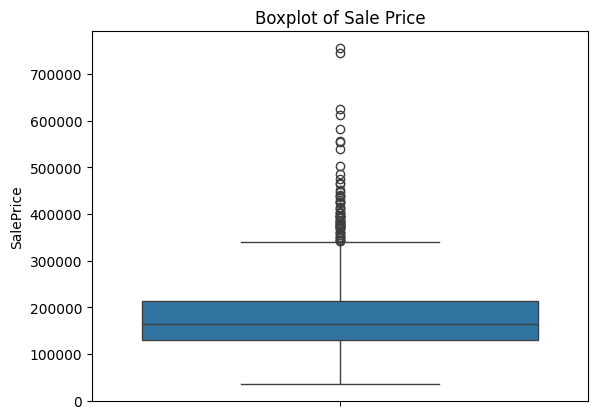

In [20]:
sns.boxplot(df['SalePrice'])
plt.title("Boxplot of Sale Price")
plt.show()

In [21]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5 * IQR) & (df['SalePrice'] <= Q3 + 1.5 * IQR)]

In [24]:
df = df.reset_index(drop=True)


## 5. Normalize selected numerical features


In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

scaler = StandardScaler()
df[['GrLivArea', 'LotArea', 'SalePrice']] = scaler.fit_transform(df[['GrLivArea', 'LotArea', 'SalePrice']])

In [26]:
print(df[['GrLivArea', 'LotArea', 'SalePrice']].head())

   GrLivArea   LotArea  SalePrice
0   0.490416 -0.204916   0.646235
1  -0.442178 -0.066726   0.190222
2   0.648623  0.131547   0.899575
3   0.504987 -0.072734  -0.510685
4   1.506277  0.493245   1.347142


## 6. Final Output

In [29]:
df.to_csv('cleaned_house_prices.csv', index=False)

In [30]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,-0.204916,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,0.646235
1,2,20,3,80.0,-0.066726,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,0.190222
2,3,60,3,68.0,0.131547,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,0.899575
3,4,70,3,60.0,-0.072734,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,-0.510685
4,5,60,3,84.0,0.493245,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,1.347142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1456,60,3,62.0,-0.268964,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,0.080442
1395,1457,20,3,85.0,0.362866,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,0.671569
1396,1458,70,3,66.0,-0.133778,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,1.625816
1397,1459,20,3,68.0,-0.052666,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,-0.474795
